In [1]:
import numpy as np
import matplotlib.pyplot as plt

Estimador de Hamilton 

$\zeta(r) = \frac{DD(r)RR(r)}{[DR(r)^{2}]}-1$

Estimador de Landy-Szalay

$\zeta(r) = 1- \left(\frac{N_{r}}{N}\right)^{2}\frac{DD(r)}{RR(r)}- 2\frac{DR(r)}{RR(r)}$

In [271]:
def Ham(data, random, size): #la función recibe los datos reales, los datos aleatorios, y el tamaño de los bines
    C = np.append(data,random)
    corr = np.zeros(size)
    landy = np.zeros(size)
    for j in range(size):
        DD = []
        for i in range(len(D)):
            if D[j]-D[i] <= 10:
                DD = np.append(DD, D[i])
        RR = []
        for i in range(len(D)):
            if R[j]-R[i] <= 10:
                RR = np.append(RR, R[i])
        DR = []
        for i in range(len(C)):
            if C[j]-C[i] <= 10:
                DR = np.append(DR, C[i]) 
        
        corr[j] = (len(DD)*len(RR))/(len(DR)**2) - 1
        landy[j] = 1 -(len(DD)/len(RR))-2*(len(DR)/len(RR))
    return corr, landy        

In [151]:
rng = np.random.default_rng()    
D = rng.integers(low = 0, high = 100, size = 1000) #datos random
R = rng.integers(low = 0, high = 100, size = 1000) #datos random

In [152]:
correlation_function = Ham(D,R,100)

In [153]:
correlation_function

array([-0.66993126, -0.43611556, -0.75986195, -0.74192275, -0.8782219 ,
       -0.88007687, -0.25610684, -0.8815438 , -0.64088093, -0.8051751 ,
       -0.95760779, -0.83147945, -0.6585062 , -0.9118999 , -0.75204184,
       -0.75      , -0.90891315, -0.81888944, -0.83956986, -0.73730694,
       -0.36928994,  0.60579861, -0.70599855, -0.79683993, -0.9155    ,
       -0.92027345, -0.77766582, -0.50815259, -0.56587256, -0.65136936,
       -0.47597943, -0.44319645, -0.28866651, -0.72423088, -0.85528091,
       -0.75250564, -0.69652675, -0.60418375, -0.81846743, -0.84492614,
       -0.66912366,  0.02780157, -0.88309119, -0.75280899, -0.62180715,
       -0.84655397, -0.59650967, -0.70970857, -0.58814091, -0.81006339,
       -0.30911363,  0.16510382, -0.74643257, -0.48227695, -0.856     ,
       -0.89036586,  0.43520334, -0.9376892 , -0.70818651, -0.54418833,
       -0.79765291, -0.39404925, -0.68553571, -0.81329539, -0.869     ,
       -0.91725   , -0.72040459, -0.68678236, -0.85157286, -0.42

(-2.0, 10.0)

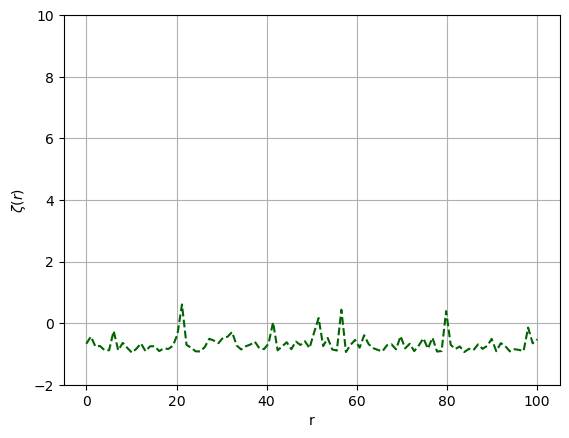

In [160]:
plt.plot(np.linspace(0,100,100), correlation_function, color = 'darkgreen', linestyle = '--')
plt.grid()
plt.ylabel(r'$\zeta(r)$')
plt.xlabel('r')
plt.ylim(-2,10)

**Notamos que para dos datasets de datos random la función de correlación es en promedio 0, por tanto la función que calcula la función de correlación está funcionando adecuadamente**

In [155]:
#Descargamos los datos reales

data = np.load('LCDM_4096_L1000_z0.npy')

In [162]:
np.max(data[:,0:1])

999.994324

In [163]:
R = rng.integers(low = np.min(data), high = np.max(data), size = len(data)) # generamos datos random de la misma dimensión de los datos

In [273]:
corr_2, l_corr2 = Ham(data[:,0:1], R, 200)

In [274]:
corr_2.shape, l_corr2.shape

((200,), (200,))

Text(0.5, 0, 'r')

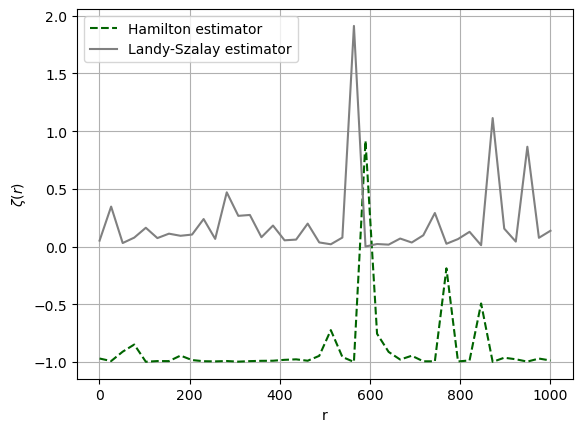

In [275]:
plt.plot(np.linspace(np.min(data),np.max(data),40), corr_2[::5], color = 'darkgreen', linestyle = '--', label = 'Hamilton estimator')
plt.plot(np.linspace(np.min(data),np.max(data),40), -(l_corr2[::5])/200, color = 'gray', linestyle = '-', label = 'Landy-Szalay estimator')
plt.grid()
plt.legend()
plt.ylabel(r'$\zeta(r)$')
plt.xlabel('r')
#plt.ylim(-2,10)

Text(0.5, 1.0, 'Hamilton estimator')

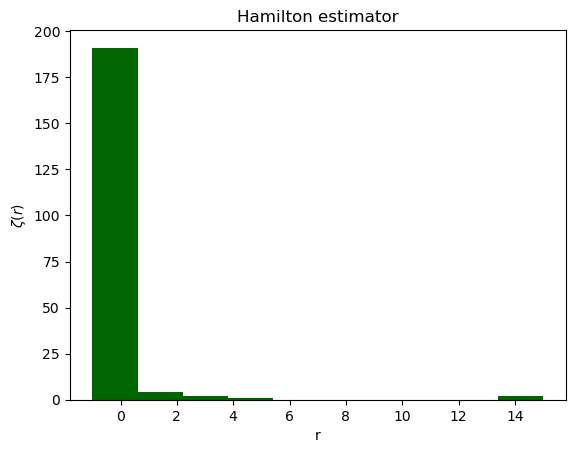

In [276]:
plt.hist(corr_2, bins = 10, color = 'darkgreen')
plt.ylabel(r'$\zeta(r)$')
plt.xlabel('r')
plt.title('Hamilton estimator')

Text(0.5, 1.0, 'Landy-Szalay estimator')

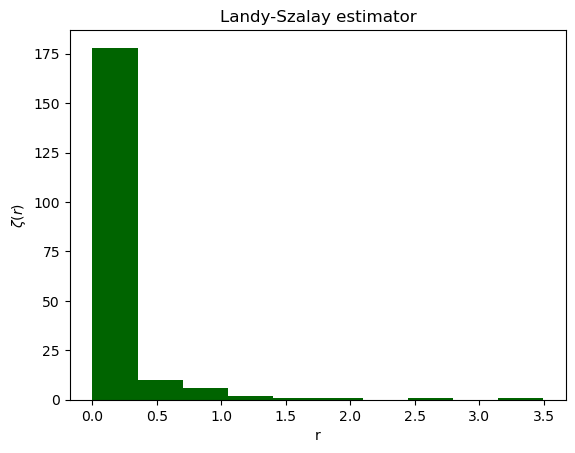

In [278]:
plt.hist(-l_corr2/200, bins = 10, color = 'darkgreen')
plt.ylabel(r'$\zeta(r)$')
plt.xlabel('r')
plt.title('Landy-Szalay estimator')